**Borrelia 2019_all Clinical + Lab Data**

2019_all.csv :  2019 only, all febrile patients including the malaria positive patients. Lab data is included. 

**1. Importing and Reading Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

2019Final&Lab_data.ipynb       2019_all.csv
2019Final_clinical_data.ipynb


In [3]:
df = pd.read_csv("2019_all.csv")

In [4]:
df

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,SHC0701,54.0,F,Thies,36.2,no_fever,2.0,78.0,normal,2.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,SHC0702,12.0,F,Thies,39.3,fever,1.0,99.0,normal,2.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,SHC0703,54.0,F,Thies,37.7,no_fever,2.0,119.0,high,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,SHC0704,30.0,M,Thies,36.8,no_fever,2.0,92.0,normal,2.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,SHC0705,17.0,F,Thies,37.0,no_fever,2.0,88.0,normal,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        201 non-null    object 
 1   Age                               201 non-null    float64
 2   Sexe                              201 non-null    object 
 3   Lieu actuel de ésidence_category  196 non-null    object 
 4   Temperature                       201 non-null    float64
 5   Temperature_category              201 non-null    object 
 6   NbreJrsFievre                     184 non-null    float64
 7   Rythme cardiaque                  190 non-null    float64
 8   Rythme cardiaque_category         190 non-null    object 
 9   Antibiotiques pris                200 non-null    float64
 10  Antipaludiques pris               188 non-null    float64
 11  Diagnostic paludisme recu         200 non-null    float64
 12  enceinte

In [6]:
#calling out continuous variables from data
def get_continuous_variables(df):
    continuous_vars = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continuous_vars.append(col)
    return continuous_vars

In [7]:
continuous_variables = get_continuous_variables(df)
print("Continuous variables:", continuous_variables)

Continuous variables: ['Age', 'Temperature', 'NbreJrsFievre', 'Rythme cardiaque', 'Antibiotiques pris', 'Antipaludiques pris', 'Diagnostic paludisme recu', 'enceinte', 'sympt_mal_tete', 'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse', 'sympt_mal_dos', 'sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee', 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'sympt_convulsions', 'sympt_perte_conaissance', 'sympt_Prostration', 'sympt_abdo_pain', 'sympt_dental', 'sympt_anorex', 'sympt_dysphagia', 'sympt_wound', 'sympt_eye_problem', 'glycemie', 'hemoglobine', 'TDR_Resultat', 'goutte_epaisse_Resultat', 'frottis_mince_Resultat', 'DensitePfalciparum_modified', 'contact_pers_febrile', 'contact_presence_rats', 'voyage_fait', 'WBC_COUNT', 'LYMPH_COUNT', 'MID_COUNT', 'GRAN_COUNT', 'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT', 'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT', 'MCV', 'MCH', 'MCHC', 'RDW-CV', 'RDW-SD', 'PLT', 'MPV', 'PDW', 'P

In [8]:
num_vars = len(df.columns)
print("Number of variables (using len):", num_vars)

Number of variables (using len): 65


In [9]:
# Count variables with null values
null_counts = df.isnull().sum()
pd.set_option('display.max_rows', len(df.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Unnamed: 0                           0
Age                                  0
Sexe                                 0
Lieu actuel de ésidence_category     5
Temperature                          0
Temperature_category                 0
NbreJrsFievre                       17
Rythme cardiaque                    11
Rythme cardiaque_category           11
Antibiotiques pris                   1
Antipaludiques pris                 13
Diagnostic paludisme recu            1
enceinte                            23
sympt_mal_tete                       1
sympt_courbatures                    1
sympt_vertiges                       1
sympt_vomissements                   1
sympt_fatigue_faiblesse              1
sympt_mal_dos                        1
sympt_douleur_thoracique             1
sympt_difficulte_respirer            1
sympt_eruption_cutanee               1
sympt_toux_maldegorge                1
sympt_inflammation                   1
sympt_saignement                     1
sympt_convulsions        

In [10]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# import pandas_profiling as pp
# pp.ProfileReport(df)

In [11]:
df

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,SHC0701,54.0,F,Thies,36.2,no_fever,2.0,78.0,normal,2.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,SHC0702,12.0,F,Thies,39.3,fever,1.0,99.0,normal,2.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,SHC0703,54.0,F,Thies,37.7,no_fever,2.0,119.0,high,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,SHC0704,30.0,M,Thies,36.8,no_fever,2.0,92.0,normal,2.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,SHC0705,17.0,F,Thies,37.0,no_fever,2.0,88.0,normal,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [12]:
import numpy as np

In [13]:
bpos = len(df[df['Borrelia'] == 1])
bneg = len(df[df['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df.columns))
print(df.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 185
                             count     min       max
Age                          201.0    2.00     62.00
Temperature                  201.0   36.00     41.50
NbreJrsFievre                184.0    1.00      5.00
Rythme cardiaque             190.0   56.00    389.00
Antibiotiques pris           200.0    1.00      2.00
Antipaludiques pris          188.0    1.00      2.00
Diagnostic paludisme recu    200.0    1.00      2.00
enceinte                     178.0    2.00      2.00
sympt_mal_tete               200.0    1.00      2.00
sympt_courbatures            200.0    1.00      2.00
sympt_vertiges               200.0    1.00      2.00
sympt_vomissements           200.0    1.00      2.00
sympt_fatigue_faiblesse      200.0    1.00      2.00
sympt_mal_dos                200.0    1.00      2.00
sympt_douleur_thoracique     200.0    1.00      2.00
sympt_difficulte_respirer    200.0    1.00      2.00
sympt_eruption_cutanee       200.0    1.

In [14]:
for i in df.columns:
    print(i,len(df[i].unique()))

Unnamed: 0 201
Age 52
Sexe 2
Lieu actuel de ésidence_category 4
Temperature 46
Temperature_category 3
NbreJrsFievre 6
Rythme cardiaque 62
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
enceinte 2
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_convulsions 3
sympt_perte_conaissance 3
sympt_Prostration 3
sympt_abdo_pain 2
sympt_dental 2
sympt_anorex 2
sympt_dysphagia 1
sympt_wound 2
sympt_eye_problem 1
glycemie 84
hemoglobine 96
TDR_Resultat 2
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
DensitePfalciparum_modified 9
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
WBC_COUNT 105
LYMPH_COUNT 42
MID_COUNT 18
GRAN_COUNT 99
LYMPH_PCT 158
MID_PCT 85
GRAN_PCT 162
RBC_COUNT 17

In [15]:
df1 = df.copy()
df1

,Unnamed: 0,Age,Sexe,Lieu actuel de ésidence_category,Temperature,Temperature_category,NbreJrsFievre,Rythme cardiaque,Rythme cardiaque_category,Antibiotiques pris,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,SHC0701,54.0,F,Thies,36.2,no_fever,2.0,78.0,normal,2.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,SHC0702,12.0,F,Thies,39.3,fever,1.0,99.0,normal,2.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,SHC0703,54.0,F,Thies,37.7,no_fever,2.0,119.0,high,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,SHC0704,30.0,M,Thies,36.8,no_fever,2.0,92.0,normal,2.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,SHC0705,17.0,F,Thies,37.0,no_fever,2.0,88.0,normal,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,SHC1102,26.0,F,Thies,38.0,fever,4.0,101.0,high,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,SHC1103,12.0,M,Thies,38.0,fever,3.0,58.0,low,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,SHC1104,54.0,M,Thies,37.9,no_fever,2.0,74.0,normal,2.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,SHC1105,11.0,F,Thies,41.5,severe_fever,2.0,96.0,normal,2.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [16]:
for i in df1.columns:
    print(i,len(df1[i].unique()))

Unnamed: 0 201
Age 52
Sexe 2
Lieu actuel de ésidence_category 4
Temperature 46
Temperature_category 3
NbreJrsFievre 6
Rythme cardiaque 62
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
enceinte 2
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_convulsions 3
sympt_perte_conaissance 3
sympt_Prostration 3
sympt_abdo_pain 2
sympt_dental 2
sympt_anorex 2
sympt_dysphagia 1
sympt_wound 2
sympt_eye_problem 1
glycemie 84
hemoglobine 96
TDR_Resultat 2
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
DensitePfalciparum_modified 9
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
WBC_COUNT 105
LYMPH_COUNT 42
MID_COUNT 18
GRAN_COUNT 99
LYMPH_PCT 158
MID_PCT 85
GRAN_PCT 162
RBC_COUNT 17

In [17]:
# Delete columns year and lab data

# Delete column temperature, 
df1 = df1.drop(['Unnamed: 0', 'Rythme cardiaque', 'enceinte', 'NbreJrsFievre', 'Lieu actuel de ésidence_category', 'Temperature', 'sympt_convulsions',
               'sympt_perte_conaissance', 'sympt_Prostration', 'sympt_dental', 'sympt_anorex', 'sympt_wound', 'DensitePfalciparum_modified'], axis=1)


# Print the updated DataFrame
print("Updated DataFrame:")
print(df1)

Updated DataFrame:
      Age Sexe Temperature_category Rythme cardiaque_category  \
0    54.0    F             no_fever                    normal   
1    12.0    F                fever                    normal   
2    54.0    F             no_fever                      high   
3    30.0    M             no_fever                    normal   
4    17.0    F             no_fever                    normal   
..    ...  ...                  ...                       ...   
196  26.0    F                fever                      high   
197  12.0    M                fever                       low   
198  54.0    M             no_fever                    normal   
199  11.0    F         severe_fever                    normal   
200  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
1                   2.0                  NaN      

In [18]:
df1

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,12.0,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,54.0,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,30.0,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


*df1 is df that has null values i.e. may need imputation to fill null values*

In [19]:
df2 = df1.copy()
df2

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,12.0,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,54.0,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,30.0,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [20]:
for i in df2.columns:
    print(i,len(df2[i].unique()))

Age 52
Sexe 2
Temperature_category 3
Rythme cardiaque_category 4
Antibiotiques pris 3
Antipaludiques pris 3
Diagnostic paludisme recu 3
sympt_mal_tete 3
sympt_courbatures 3
sympt_vertiges 3
sympt_vomissements 3
sympt_fatigue_faiblesse 3
sympt_mal_dos 3
sympt_douleur_thoracique 3
sympt_difficulte_respirer 3
sympt_eruption_cutanee 3
sympt_toux_maldegorge 3
sympt_inflammation 3
sympt_saignement 3
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 84
hemoglobine 96
TDR_Resultat 2
goutte_epaisse_Resultat 3
frottis_mince_Resultat 3
contact_pers_febrile 3
contact_presence_rats 3
voyage_fait 3
voyage_details_category 5
saison 2
WBC_COUNT 105
LYMPH_COUNT 42
MID_COUNT 18
GRAN_COUNT 99
LYMPH_PCT 158
MID_PCT 85
GRAN_PCT 162
RBC_COUNT 171
HGB_COUNT 123
HCT_PCT 151
MCV 135
MCH 88
MCHC 53
RDW-CV 49
RDW-SD 90
PLT 154
MPV 50
PDW 43
PCT 149
Borrelia 2


In [21]:
# Remove rows with null values in df2
df2 = df2.dropna()

# Print the DataFrame after removing null values
print("DataFrame after removing null values:")
print(df2)

DataFrame after removing null values:
      Age Sexe Temperature_category Rythme cardiaque_category  \
0    54.0    F             no_fever                    normal   
4    17.0    F             no_fever                    normal   
5    13.0    F             no_fever                    normal   
6    17.0    M                fever                    normal   
7    19.0    M             no_fever                       low   
..    ...  ...                  ...                       ...   
186  15.0    F                fever                      high   
187  36.0    F             no_fever                    normal   
191   5.0    F                fever                    normal   
192   7.0    M         severe_fever                    normal   
193   4.0    M         severe_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
4                   2.0        

In [22]:
# Select features with strings
names_columns = df2.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'Sexe', 'Temperature_category', 'Rythme cardiaque_category',
       'Antibiotiques pris', 'Antipaludiques pris',
       'Diagnostic paludisme recu', 'sympt_mal_tete', 'sympt_courbatures',
       'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse',
       'sympt_mal_dos', 'sympt_douleur_thoracique',
       'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
       'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement',
       'sympt_abdo_pain', 'sympt_dysphagia', 'sympt_eye_problem', 'glycemie',
       'hemoglobine', 'TDR_Resultat', 'goutte_epaisse_Resultat',
       'frottis_mince_Resultat', 'contact_pers_febrile',
       'contact_presence_rats', 'voyage_fait', 'voyage_details_category',
       'saison', 'WBC_COUNT', 'LYMPH_COUNT', 'MID_COUNT', 'GRAN_COUNT',
       'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT', 'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT',
       'MCV', 'MCH', 'MCHC', 'RDW-CV', 'RDW-SD', 'PLT', 'MPV', 'PDW', 'PCT',
       'Borrelia']

In [23]:
for i in df2.columns:
    print(i,len(df2[i].unique()))

Age 45
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 67
hemoglobine 72
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
WBC_COUNT 79
LYMPH_COUNT 39
MID_COUNT 15
GRAN_COUNT 75
LYMPH_PCT 109
MID_PCT 70
GRAN_PCT 107
RBC_COUNT 121
HGB_COUNT 96
HCT_PCT 104
MCV 97
MCH 66
MCHC 41
RDW-CV 41
RDW-SD 74
PLT 110
MPV 43
PDW 37
PCT 106
Borrelia 2


In [24]:
# Count variables with null values
null_counts = df2.isnull().sum()
pd.set_option('display.max_rows', len(df2.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
TDR_Resultat                 0
goutte_epaisse_Resultat      0
frottis_mince_Resultat       0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
WBC_COUN

*df2 is df that has null values removed i.e. no imputation done*

In [25]:
df3 = df2.copy()
df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
5,13.0,F,no_fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,89.1,29.1,327.0,13.8,42.8,69.0,9.4,15.8,0.65,0.0
6,17.0,M,fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,90.9,29.2,321.0,12.3,38.7,78.0,9.0,16.6,0.70,0.0
7,19.0,M,no_fever,low,1.0,1.0,1.0,1.0,1.0,1.0,...,76.8,25.5,333.0,13.6,36.2,26.0,11.9,17.1,0.31,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,15.0,F,fever,high,2.0,2.0,1.0,1.0,2.0,1.0,...,79.3,25.3,319.0,15.0,41.1,363.0,10.4,15.6,3.76,0.0
187,36.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,66.1,19.8,299.0,16.9,38.6,402.0,9.6,15.7,3.86,0.0
191,5.0,F,fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,77.7,23.9,307.0,21.4,57.6,156.0,10.8,16.8,1.69,0.0
192,7.0,M,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,79.9,25.8,323.0,13.9,38.4,175.0,9.6,16.7,1.68,1.0


In [26]:
# Count variables with null values
null_counts = df3.isnull().sum()
pd.set_option('display.max_rows', len(df3.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
TDR_Resultat                 0
goutte_epaisse_Resultat      0
frottis_mince_Resultat       0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
WBC_COUN

In [27]:
# Count variables with null values
null_counts = df1.isnull().sum()
pd.set_option('display.max_rows', len(df1.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                           0
Sexe                          0
Temperature_category          0
Rythme cardiaque_category    11
Antibiotiques pris            1
Antipaludiques pris          13
Diagnostic paludisme recu     1
sympt_mal_tete                1
sympt_courbatures             1
sympt_vertiges                1
sympt_vomissements            1
sympt_fatigue_faiblesse       1
sympt_mal_dos                 1
sympt_douleur_thoracique      1
sympt_difficulte_respirer     1
sympt_eruption_cutanee        1
sympt_toux_maldegorge         1
sympt_inflammation            1
sympt_saignement              1
sympt_abdo_pain               0
sympt_dysphagia               0
sympt_eye_problem             0
glycemie                      3
hemoglobine                  16
TDR_Resultat                  0
goutte_epaisse_Resultat      10
frottis_mince_Resultat       27
contact_pers_febrile          4
contact_presence_rats         4
voyage_fait                   5
voyage_details_category      10
saison  

In [28]:
df_imputed = df1.copy()
df_imputed

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,85.8,29.1,340.0,14.0,41.5,122.0,9.6,16.4,1.17,0.0
1,12.0,F,fever,normal,2.0,NaN,2.0,1.0,1.0,1.0,...,81.6,25.8,316.0,15.1,42.5,140.0,9.9,15.9,1.39,0.0
2,54.0,F,no_fever,high,2.0,NaN,2.0,1.0,1.0,2.0,...,91.2,28.8,316.0,14.0,44.1,128.0,10.2,16.4,1.31,0.0
3,30.0,M,no_fever,normal,2.0,NaN,1.0,1.0,1.0,1.0,...,69.6,22.3,321.0,15.1,36.2,200.0,9.3,16.1,1.85,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,79.7,24.6,309.0,13.9,38.4,84.0,9.3,16.8,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,86.5,27.8,321.0,13.5,40.5,186.0,10.2,16.9,1.89,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,101.2,34.1,337.0,13.1,45.9,121.0,8.9,16.8,1.08,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,83.2,28.7,345.0,12.9,37.1,147.0,10.2,17.0,1.50,1.0


In [29]:
#Imputing num_vars

from fancyimpute import IterativeImputer
import pandas as pd

columnsSelected = ['glycemie', 'hemoglobine', 'WBC_COUNT', 'LYMPH_COUNT', 'MID_COUNT', 'GRAN_COUNT',
       'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT', 'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT',
       'MCV', 'MCH', 'MCHC', 'RDW-CV', 'RDW-SD', 'PLT', 'MPV', 'PDW', 'PCT']

# Perform multiple imputation using MICE
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(df_imputed[columnsSelected])

# Replace the missing values in the original DataFrame with the imputed values
df_imputed[columnsSelected] = imputed_data

# Display the imputed data
print(df_imputed)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    54.0    F             no_fever                    normal   
1    12.0    F                fever                    normal   
2    54.0    F             no_fever                      high   
3    30.0    M             no_fever                    normal   
4    17.0    F             no_fever                    normal   
..    ...  ...                  ...                       ...   
196  26.0    F                fever                      high   
197  12.0    M                fever                       low   
198  54.0    M             no_fever                    normal   
199  11.0    F         severe_fever                    normal   
200  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
1                   2.0                  NaN                        2

In [30]:
# Count variables with null values
null_counts = df_imputed.isnull().sum()
pd.set_option('display.max_rows', len(df_imputed.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                           0
Sexe                          0
Temperature_category          0
Rythme cardiaque_category    11
Antibiotiques pris            1
Antipaludiques pris          13
Diagnostic paludisme recu     1
sympt_mal_tete                1
sympt_courbatures             1
sympt_vertiges                1
sympt_vomissements            1
sympt_fatigue_faiblesse       1
sympt_mal_dos                 1
sympt_douleur_thoracique      1
sympt_difficulte_respirer     1
sympt_eruption_cutanee        1
sympt_toux_maldegorge         1
sympt_inflammation            1
sympt_saignement              1
sympt_abdo_pain               0
sympt_dysphagia               0
sympt_eye_problem             0
glycemie                      0
hemoglobine                   0
TDR_Resultat                  0
goutte_epaisse_Resultat      10
frottis_mince_Resultat       27
contact_pers_febrile          4
contact_presence_rats         4
voyage_fait                   5
voyage_details_category      10
saison  

In [31]:
#Imputing cat_vars in df_imputed dataframe using Mode

def mode_imputation(data, categorical_columns):
    # Make a copy of the original data to avoid modifying the original dataframe
    imputed_data = data.copy()
    
    # Iterate over each column in the list of categorical columns
    for column in categorical_columns:
        # Check if the column contains categorical data (object or categorical type)
        if imputed_data[column].dtype == 'float64' or imputed_data[column].dtype == 'object' or pd.api.types.is_categorical_dtype(imputed_data[column]):
            # Calculate the mode (most frequent value) of the column
            mode_value = imputed_data[column].mode().iloc[0]
            
            # Fill missing values with the mode value
            imputed_data[column].fillna(mode_value, inplace=True)
    
    return imputed_data

columns_to_impute = ['Rythme cardiaque_category', 'Antibiotiques pris', 'Antipaludiques pris','Diagnostic paludisme recu',
 'sympt_mal_tete', 'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements', 'sympt_fatigue_faiblesse',
 'sympt_mal_dos','sympt_douleur_thoracique', 'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
 'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'TDR_Resultat', 'goutte_epaisse_Resultat', 
'frottis_mince_Resultat', 'contact_pers_febrile','contact_presence_rats','voyage_fait','voyage_details_category']

imputed_dataFinal = mode_imputation(df_imputed, columns_to_impute)

imputed_dataFinal

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,85.800000,29.100000,340.000000,14.000000,41.500000,122.000000,9.600000,16.400000,1.170000,0.0
1,12.0,F,fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,81.600000,25.800000,316.000000,15.100000,42.500000,140.000000,9.900000,15.900000,1.390000,0.0
2,54.0,F,no_fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,91.200000,28.800000,316.000000,14.000000,44.100000,128.000000,10.200000,16.400000,1.310000,0.0
3,30.0,M,no_fever,normal,2.0,2.0,1.0,1.0,1.0,1.0,...,69.600000,22.300000,321.000000,15.100000,36.200000,200.000000,9.300000,16.100000,1.850000,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,79.700000,24.600000,309.000000,13.900000,38.400000,84.000000,9.300000,16.800000,0.780000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,86.500000,27.800000,321.000000,13.500000,40.500000,186.000000,10.200000,16.900000,1.890000,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,84.499381,27.567704,326.034435,13.923985,40.469518,153.396944,10.079525,16.774109,1.497690,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,101.200000,34.100000,337.000000,13.100000,45.900000,121.000000,8.900000,16.800000,1.080000,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,83.200000,28.700000,345.000000,12.900000,37.100000,147.000000,10.200000,17.000000,1.500000,1.0


In [32]:
# Count variables with null values
null_counts = imputed_dataFinal.isnull().sum()
pd.set_option('display.max_rows', len(imputed_dataFinal.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
TDR_Resultat                 0
goutte_epaisse_Resultat      0
frottis_mince_Resultat       0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
WBC_COUN

*imputed_dataFinal is the df that has imputed null values & df2 is the df that has null values removed*

In [33]:
df3 = imputed_dataFinal.copy()
df3

,Age,Sexe,Temperature_category,Rythme cardiaque_category,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,...,MCV,MCH,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia
0,54.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,85.800000,29.100000,340.000000,14.000000,41.500000,122.000000,9.600000,16.400000,1.170000,0.0
1,12.0,F,fever,normal,2.0,2.0,2.0,1.0,1.0,1.0,...,81.600000,25.800000,316.000000,15.100000,42.500000,140.000000,9.900000,15.900000,1.390000,0.0
2,54.0,F,no_fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,91.200000,28.800000,316.000000,14.000000,44.100000,128.000000,10.200000,16.400000,1.310000,0.0
3,30.0,M,no_fever,normal,2.0,2.0,1.0,1.0,1.0,1.0,...,69.600000,22.300000,321.000000,15.100000,36.200000,200.000000,9.300000,16.100000,1.850000,0.0
4,17.0,F,no_fever,normal,2.0,2.0,2.0,1.0,2.0,2.0,...,79.700000,24.600000,309.000000,13.900000,38.400000,84.000000,9.300000,16.800000,0.780000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,fever,high,2.0,2.0,2.0,1.0,1.0,2.0,...,86.500000,27.800000,321.000000,13.500000,40.500000,186.000000,10.200000,16.900000,1.890000,0.0
197,12.0,M,fever,low,2.0,2.0,1.0,1.0,2.0,1.0,...,84.499381,27.567704,326.034435,13.923985,40.469518,153.396944,10.079525,16.774109,1.497690,0.0
198,54.0,M,no_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,101.200000,34.100000,337.000000,13.100000,45.900000,121.000000,8.900000,16.800000,1.080000,0.0
199,11.0,F,severe_fever,normal,2.0,2.0,2.0,1.0,2.0,1.0,...,83.200000,28.700000,345.000000,12.900000,37.100000,147.000000,10.200000,17.000000,1.500000,1.0


In [34]:
# Count variables with null values
null_counts = df3.isnull().sum()
pd.set_option('display.max_rows', len(df3.columns))
print(null_counts)
pd.reset_option('display.max_rows')

Age                          0
Sexe                         0
Temperature_category         0
Rythme cardiaque_category    0
Antibiotiques pris           0
Antipaludiques pris          0
Diagnostic paludisme recu    0
sympt_mal_tete               0
sympt_courbatures            0
sympt_vertiges               0
sympt_vomissements           0
sympt_fatigue_faiblesse      0
sympt_mal_dos                0
sympt_douleur_thoracique     0
sympt_difficulte_respirer    0
sympt_eruption_cutanee       0
sympt_toux_maldegorge        0
sympt_inflammation           0
sympt_saignement             0
sympt_abdo_pain              0
sympt_dysphagia              0
sympt_eye_problem            0
glycemie                     0
hemoglobine                  0
TDR_Resultat                 0
goutte_epaisse_Resultat      0
frottis_mince_Resultat       0
contact_pers_febrile         0
contact_presence_rats        0
voyage_fait                  0
voyage_details_category      0
saison                       0
WBC_COUN

In [35]:
bpos = len(df3[df3['Borrelia'] == 1])
bneg = len(df3[df3['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df3.columns))
print(df3.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 185
                           count     min       max
Age                        201.0    2.00   62.0000
Antibiotiques pris         201.0    1.00    2.0000
Antipaludiques pris        201.0    1.00    2.0000
Diagnostic paludisme recu  201.0    1.00    2.0000
sympt_mal_tete             201.0    1.00    2.0000
sympt_courbatures          201.0    1.00    2.0000
sympt_vertiges             201.0    1.00    2.0000
sympt_vomissements         201.0    1.00    2.0000
sympt_fatigue_faiblesse    201.0    1.00    2.0000
sympt_mal_dos              201.0    1.00    2.0000
sympt_douleur_thoracique   201.0    1.00    2.0000
sympt_difficulte_respirer  201.0    1.00    2.0000
sympt_eruption_cutanee     201.0    1.00    2.0000
sympt_toux_maldegorge      201.0    1.00    2.0000
sympt_inflammation         201.0    1.00    2.0000
sympt_saignement           201.0    1.00    2.0000
sympt_abdo_pain            201.0    1.00    2.0000
sympt_dysphagia        

In [36]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 52
Sexe 2
Temperature_category 3
Rythme cardiaque_category 3
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 86
hemoglobine 111
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
WBC_COUNT 108
LYMPH_COUNT 45
MID_COUNT 21
GRAN_COUNT 102
LYMPH_PCT 161
MID_PCT 88
GRAN_PCT 165
RBC_COUNT 175
HGB_COUNT 126
HCT_PCT 154
MCV 138
MCH 91
MCHC 56
RDW-CV 52
RDW-SD 93
PLT 157
MPV 53
PDW 46
PCT 152
Borrelia 2


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [38]:
# Select ordinal columns to Label encode
columns_to_encode = ['Temperature_category','Rythme cardiaque_category']


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for col in columns_to_encode:
    df3[col + '_encoded'] = label_encoder.fit_transform(df3[col])

print(df3)

      Age Sexe Temperature_category Rythme cardiaque_category  \
0    54.0    F             no_fever                    normal   
1    12.0    F                fever                    normal   
2    54.0    F             no_fever                      high   
3    30.0    M             no_fever                    normal   
4    17.0    F             no_fever                    normal   
..    ...  ...                  ...                       ...   
196  26.0    F                fever                      high   
197  12.0    M                fever                       low   
198  54.0    M             no_fever                    normal   
199  11.0    F         severe_fever                    normal   
200  15.0    M             no_fever                    normal   

     Antibiotiques pris  Antipaludiques pris  Diagnostic paludisme recu  \
0                   2.0                  2.0                        2.0   
1                   2.0                  2.0                        2

In [39]:
# Delete columns 
df3 = df3.drop(['Temperature_category','Rythme cardiaque_category'], axis=1)

In [40]:
df3

,Age,Sexe,Antibiotiques pris,Antipaludiques pris,Diagnostic paludisme recu,sympt_mal_tete,sympt_courbatures,sympt_vertiges,sympt_vomissements,sympt_fatigue_faiblesse,...,MCHC,RDW-CV,RDW-SD,PLT,MPV,PDW,PCT,Borrelia,Temperature_category_encoded,Rythme cardiaque_category_encoded
0,54.0,F,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,...,340.000000,14.000000,41.500000,122.000000,9.600000,16.400000,1.170000,0.0,1,2
1,12.0,F,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,316.000000,15.100000,42.500000,140.000000,9.900000,15.900000,1.390000,0.0,0,2
2,54.0,F,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,316.000000,14.000000,44.100000,128.000000,10.200000,16.400000,1.310000,0.0,1,0
3,30.0,M,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,321.000000,15.100000,36.200000,200.000000,9.300000,16.100000,1.850000,0.0,1,2
4,17.0,F,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,...,309.000000,13.900000,38.400000,84.000000,9.300000,16.800000,0.780000,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,F,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,...,321.000000,13.500000,40.500000,186.000000,10.200000,16.900000,1.890000,0.0,0,0
197,12.0,M,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,326.034435,13.923985,40.469518,153.396944,10.079525,16.774109,1.497690,0.0,0,1
198,54.0,M,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,...,337.000000,13.100000,45.900000,121.000000,8.900000,16.800000,1.080000,0.0,1,2
199,11.0,F,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,...,345.000000,12.900000,37.100000,147.000000,10.200000,17.000000,1.500000,1.0,2,2


In [41]:
for i in df3.columns:
    print(i,len(df3[i].unique()))

Age 52
Sexe 2
Antibiotiques pris 2
Antipaludiques pris 2
Diagnostic paludisme recu 2
sympt_mal_tete 2
sympt_courbatures 2
sympt_vertiges 2
sympt_vomissements 2
sympt_fatigue_faiblesse 2
sympt_mal_dos 2
sympt_douleur_thoracique 2
sympt_difficulte_respirer 2
sympt_eruption_cutanee 2
sympt_toux_maldegorge 2
sympt_inflammation 2
sympt_saignement 2
sympt_abdo_pain 2
sympt_dysphagia 1
sympt_eye_problem 1
glycemie 86
hemoglobine 111
TDR_Resultat 2
goutte_epaisse_Resultat 2
frottis_mince_Resultat 2
contact_pers_febrile 2
contact_presence_rats 2
voyage_fait 2
voyage_details_category 4
saison 2
WBC_COUNT 108
LYMPH_COUNT 45
MID_COUNT 21
GRAN_COUNT 102
LYMPH_PCT 161
MID_PCT 88
GRAN_PCT 165
RBC_COUNT 175
HGB_COUNT 126
HCT_PCT 154
MCV 138
MCH 91
MCHC 56
RDW-CV 52
RDW-SD 93
PLT 157
MPV 53
PDW 46
PCT 152
Borrelia 2
Temperature_category_encoded 3
Rythme cardiaque_category_encoded 3


In [42]:
# Select columns for OneHot Encoding
# Convert categorical variables to dummy variables (one-hot encoding)
columns_to_encode = ['Sexe', 'Antibiotiques pris',
       'Antipaludiques pris', 'Diagnostic paludisme recu', 'sympt_mal_tete',
       'sympt_courbatures', 'sympt_vertiges', 'sympt_vomissements',
       'sympt_fatigue_faiblesse', 'sympt_mal_dos', 'sympt_douleur_thoracique',
       'sympt_difficulte_respirer', 'sympt_eruption_cutanee',
       'sympt_toux_maldegorge', 'sympt_inflammation', 'sympt_saignement', 'sympt_abdo_pain', 'sympt_dysphagia', 'sympt_eye_problem', 'TDR_Resultat', 'goutte_epaisse_Resultat',
       'frottis_mince_Resultat', 'contact_pers_febrile', 'contact_presence_rats', 'voyage_fait', 'voyage_details_category', 'saison']
                     
# Perform one-hot encoding
encoded_df = pd.get_dummies(df3, columns=columns_to_encode)

# Print the encoded dataframe
print(encoded_df)

      Age  glycemie  hemoglobine  WBC_COUNT  LYMPH_COUNT  MID_COUNT  \
0    54.0  1.100000    17.800000   4.900000     1.600000   0.200000   
1    12.0  0.850000    19.800000  12.100000     0.800000   0.300000   
2    54.0  1.820000    22.000000   6.100000     2.100000   0.300000   
3    30.0  0.980000    19.300000   8.700000     3.400000   0.600000   
4    17.0  1.000000    21.300000   2.600000     0.900000   0.200000   
..    ...       ...          ...        ...          ...        ...   
196  26.0  1.630000    10.200000   9.200000     1.800000   0.400000   
197  12.0  0.940000    10.100000   8.385279     1.794416   0.510152   
198  54.0  0.540000    11.100000  11.600000     1.800000   0.700000   
199  11.0  1.026486    14.209572  16.800000     1.400000   0.800000   
200  15.0  1.100000    13.588191   8.385279     1.794416   0.510152   

     GRAN_COUNT  LYMPH_PCT   MID_PCT   GRAN_PCT  ...  \
0      3.100000  32.400000  4.800000  62.800000  ...   
1     11.000000   6.200000  2.70000

In [43]:
# Select features with strings
names_columns = encoded_df.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'glycemie', 'hemoglobine', 'WBC_COUNT', 'LYMPH_COUNT',
       'MID_COUNT', 'GRAN_COUNT', 'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT',
       'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT', 'MCV', 'MCH', 'MCHC', 'RDW-CV',
       'RDW-SD', 'PLT', 'MPV', 'PDW', 'PCT', 'Borrelia',
       'Temperature_category_encoded', 'Rythme cardiaque_category_encoded',
       'Sexe_F', 'Sexe_M', 'Antibiotiques pris_1.0', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_1.0', 'Antipaludiques pris_2.0',
       'Diagnostic paludisme recu_1.0', 'Diagnostic paludisme recu_2.0',
       'sympt_mal_tete_1.0', 'sympt_mal_tete_2.0', 'sympt_courbatures_1.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_1.0', 'sympt_vertiges_2.0',
       'sympt_vomissements_1.0', 'sympt_vomissements_2.0',
       'sympt_fatigue_faiblesse_1.0', 'sympt_fatigue_faiblesse_2.0',
       'sympt_mal_dos_1.0', 'sympt_mal_dos_2.0',
       'sympt_douleur_thoracique_1.0', 'sympt_douleur_thoracique_2.0',
       'sympt_difficulte

In [44]:
df4 = encoded_df.copy()
df4

,Age,glycemie,hemoglobine,WBC_COUNT,LYMPH_COUNT,MID_COUNT,GRAN_COUNT,LYMPH_PCT,MID_PCT,GRAN_PCT,...,contact_presence_rats_1.0,contact_presence_rats_2.0,voyage_fait_1.0,voyage_fait_2.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,saison_seche
0,54.0,1.100000,17.800000,4.900000,1.600000,0.200000,3.100000,32.400000,4.800000,62.800000,...,1,0,0,1,0,1,0,0,0,1
1,12.0,0.850000,19.800000,12.100000,0.800000,0.300000,11.000000,6.200000,2.700000,91.100000,...,0,1,1,0,1,0,0,0,0,1
2,54.0,1.820000,22.000000,6.100000,2.100000,0.300000,3.700000,34.300000,5.500000,60.200000,...,1,0,1,0,0,0,0,1,0,1
3,30.0,0.980000,19.300000,8.700000,3.400000,0.600000,4.700000,39.000000,7.100000,53.900000,...,1,0,1,0,0,0,1,0,0,1
4,17.0,1.000000,21.300000,2.600000,0.900000,0.200000,1.500000,35.300000,6.000000,58.700000,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,1.630000,10.200000,9.200000,1.800000,0.400000,7.000000,19.500000,4.800000,75.700000,...,0,1,1,0,1,0,0,0,1,0
197,12.0,0.940000,10.100000,8.385279,1.794416,0.510152,6.080711,24.745685,6.412183,68.842132,...,1,0,0,1,0,1,0,0,1,0
198,54.0,0.540000,11.100000,11.600000,1.800000,0.700000,9.100000,15.500000,6.200000,78.300000,...,1,0,1,0,1,0,0,0,1,0
199,11.0,1.026486,14.209572,16.800000,1.400000,0.800000,14.600000,8.500000,5.000000,86.500000,...,1,0,0,1,0,1,0,0,1,0


In [45]:
# Select features with strings
names_columns = df4.columns

# Print the selected columns
print("names_columns:")
print(names_columns)

names_columns:
Index(['Age', 'glycemie', 'hemoglobine', 'WBC_COUNT', 'LYMPH_COUNT',
       'MID_COUNT', 'GRAN_COUNT', 'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT',
       'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT', 'MCV', 'MCH', 'MCHC', 'RDW-CV',
       'RDW-SD', 'PLT', 'MPV', 'PDW', 'PCT', 'Borrelia',
       'Temperature_category_encoded', 'Rythme cardiaque_category_encoded',
       'Sexe_F', 'Sexe_M', 'Antibiotiques pris_1.0', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_1.0', 'Antipaludiques pris_2.0',
       'Diagnostic paludisme recu_1.0', 'Diagnostic paludisme recu_2.0',
       'sympt_mal_tete_1.0', 'sympt_mal_tete_2.0', 'sympt_courbatures_1.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_1.0', 'sympt_vertiges_2.0',
       'sympt_vomissements_1.0', 'sympt_vomissements_2.0',
       'sympt_fatigue_faiblesse_1.0', 'sympt_fatigue_faiblesse_2.0',
       'sympt_mal_dos_1.0', 'sympt_mal_dos_2.0',
       'sympt_douleur_thoracique_1.0', 'sympt_douleur_thoracique_2.0',
       'sympt_difficulte

In [46]:
 #Delete OneHot Encoded features

# Delete columns 
columns_to_drop = ['Sexe_M', 'Antibiotiques pris_2.0',
       'Antipaludiques pris_2.0', 'Diagnostic paludisme recu_2.0', 'Diagnostic paludisme recu_2.0', 'sympt_mal_tete_2.0',
       'sympt_courbatures_2.0', 'sympt_vertiges_2.0', 'sympt_vomissements_2.0', 'sympt_fatigue_faiblesse_2.0', 
       'sympt_mal_dos_2.0', 'sympt_douleur_thoracique_2.0', 'sympt_difficulte_respirer_2.0', 'sympt_eruption_cutanee_2.0',
       'sympt_toux_maldegorge_2.0', 'sympt_inflammation_2.0', 'sympt_saignement_2.0', 'sympt_abdo_pain_2.0', 'sympt_dysphagia_2.0', 
       'sympt_eye_problem_2.0', 'TDR_Resultat_2.0', 'goutte_epaisse_Resultat_2.0', 'frottis_mince_Resultat_2.0', 
       'contact_pers_febrile_2.0', 'contact_presence_rats_2.0', 'voyage_fait_2.0', 'saison_seche']


df4 = encoded_df.drop(columns_to_drop, axis=1)
df4

,Age,glycemie,hemoglobine,WBC_COUNT,LYMPH_COUNT,MID_COUNT,GRAN_COUNT,LYMPH_PCT,MID_PCT,GRAN_PCT,...,goutte_epaisse_Resultat_1.0,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie
0,54.0,1.100000,17.800000,4.900000,1.600000,0.200000,3.100000,32.400000,4.800000,62.800000,...,0,0,0,1,0,0,1,0,0,0
1,12.0,0.850000,19.800000,12.100000,0.800000,0.300000,11.000000,6.200000,2.700000,91.100000,...,0,0,0,0,1,1,0,0,0,0
2,54.0,1.820000,22.000000,6.100000,2.100000,0.300000,3.700000,34.300000,5.500000,60.200000,...,0,0,0,1,1,0,0,0,1,0
3,30.0,0.980000,19.300000,8.700000,3.400000,0.600000,4.700000,39.000000,7.100000,53.900000,...,0,0,0,1,1,0,0,1,0,0
4,17.0,1.000000,21.300000,2.600000,0.900000,0.200000,1.500000,35.300000,6.000000,58.700000,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,1.630000,10.200000,9.200000,1.800000,0.400000,7.000000,19.500000,4.800000,75.700000,...,0,0,0,0,1,1,0,0,0,1
197,12.0,0.940000,10.100000,8.385279,1.794416,0.510152,6.080711,24.745685,6.412183,68.842132,...,0,0,1,1,0,0,1,0,0,1
198,54.0,0.540000,11.100000,11.600000,1.800000,0.700000,9.100000,15.500000,6.200000,78.300000,...,0,0,1,1,1,1,0,0,0,1
199,11.0,1.026486,14.209572,16.800000,1.400000,0.800000,14.600000,8.500000,5.000000,86.500000,...,0,0,0,1,0,0,1,0,0,1


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_scale = ['Age', 'glycemie', 'hemoglobine', 'WBC_COUNT', 'LYMPH_COUNT',
       'MID_COUNT', 'GRAN_COUNT', 'LYMPH_PCT', 'MID_PCT', 'GRAN_PCT',
       'RBC_COUNT', 'HGB_COUNT', 'HCT_PCT', 'MCV', 'MCH', 'MCHC', 'RDW-CV',
       'RDW-SD', 'PLT', 'MPV', 'PDW', 'PCT']

# Standardize numerical features
scaler = StandardScaler()
df4[columns_to_scale] = scaler.fit_transform(df4[columns_to_scale])

print("DataFrame with Standardized Numerical Features:")
print(df4)

DataFrame with Standardized Numerical Features:
          Age  glycemie  hemoglobine     WBC_COUNT   LYMPH_COUNT  \
0    2.322506  0.317280     1.046114 -7.509037e-01 -1.777410e-01   
1   -0.696680 -0.571585     1.542886  8.003370e-01 -9.091243e-01   
2    2.322506  2.877209     2.089335 -4.923636e-01  2.793736e-01   
3    0.597257 -0.109375     1.418693  6.780663e-02  1.467871e+00   
4   -0.337253 -0.038266     1.915465 -1.246439e+00 -8.177014e-01   
..        ...       ...          ...           ...           ...   
196  0.309715  2.201672    -0.841618  1.755317e-01  5.104833e-03   
197 -0.696680 -0.251593    -0.866457  1.551072e-11  1.609515e-10   
198  2.322506 -1.673776    -0.618071  6.926119e-01  5.104833e-03   
199 -0.768566  0.055904     0.154303  1.812952e+00 -3.605868e-01   
200 -0.481024  0.317280    -0.000040  1.986680e-12 -1.825564e-10   

        MID_COUNT    GRAN_COUNT     LYMPH_PCT       MID_PCT      GRAN_PCT  \
0   -9.383392e-01 -6.980669e-01  5.458925e-01 -6.562986e-0

In [48]:
# Moving target column to the end of dataframe
column_to_move = 'Borrelia'

# Get a list of column names excluding the column to be moved
other_columns = [col for col in df4.columns if col != column_to_move]

# Rearrange the dataframe with the column to be moved as the last column
df4 = df4[other_columns + [column_to_move]]

# Print the updated dataframe
print(df4)

          Age  glycemie  hemoglobine     WBC_COUNT   LYMPH_COUNT  \
0    2.322506  0.317280     1.046114 -7.509037e-01 -1.777410e-01   
1   -0.696680 -0.571585     1.542886  8.003370e-01 -9.091243e-01   
2    2.322506  2.877209     2.089335 -4.923636e-01  2.793736e-01   
3    0.597257 -0.109375     1.418693  6.780663e-02  1.467871e+00   
4   -0.337253 -0.038266     1.915465 -1.246439e+00 -8.177014e-01   
..        ...       ...          ...           ...           ...   
196  0.309715  2.201672    -0.841618  1.755317e-01  5.104833e-03   
197 -0.696680 -0.251593    -0.866457  1.551072e-11  1.609515e-10   
198  2.322506 -1.673776    -0.618071  6.926119e-01  5.104833e-03   
199 -0.768566  0.055904     0.154303  1.812952e+00 -3.605868e-01   
200 -0.481024  0.317280    -0.000040  1.986680e-12 -1.825564e-10   

        MID_COUNT    GRAN_COUNT     LYMPH_PCT       MID_PCT      GRAN_PCT  \
0   -9.383392e-01 -6.980669e-01  5.458925e-01 -6.562986e-01 -3.967747e-01   
1   -6.357978e-01  1.152072e+

In [49]:
df5 = df4.copy()
df5

,Age,glycemie,hemoglobine,WBC_COUNT,LYMPH_COUNT,MID_COUNT,GRAN_COUNT,LYMPH_PCT,MID_PCT,GRAN_PCT,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.322506,0.317280,1.046114,-7.509037e-01,-1.777410e-01,-9.383392e-01,-6.980669e-01,5.458925e-01,-6.562986e-01,-3.967747e-01,...,0,0,1,0,0,1,0,0,0,0.0
1,-0.696680,-0.571585,1.542886,8.003370e-01,-9.091243e-01,-6.357978e-01,1.152072e+00,-1.322646e+00,-1.511181e+00,1.461630e+00,...,0,0,0,1,1,0,0,0,0,0.0
2,2.322506,2.877209,2.089335,-4.923636e-01,2.793736e-01,-6.357978e-01,-5.575500e-01,6.813972e-01,-3.713377e-01,-5.675116e-01,...,0,0,1,1,0,0,0,1,0,0.0
3,0.597257,-0.109375,1.418693,6.780663e-02,1.467871e+00,2.718266e-01,-3.233552e-01,1.016593e+00,2.800014e-01,-9.812200e-01,...,0,0,1,1,0,0,1,0,0,0.0
4,-0.337253,-0.038266,1.915465,-1.246439e+00,-8.177014e-01,-9.383392e-01,-1.072779e+00,7.527155e-01,-1.677942e-01,-6.660136e-01,...,0,0,1,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.309715,2.201672,-0.841618,1.755317e-01,5.104833e-03,-3.332563e-01,2.152928e-01,-3.741132e-01,-6.562986e-01,4.503425e-01,...,0,0,0,1,1,0,0,0,1,0.0
197,-0.696680,-0.251593,-0.866457,1.551072e-11,1.609515e-10,1.157405e-09,-1.455111e-10,-1.388537e-11,3.198252e-10,-4.585737e-11,...,0,1,1,0,0,1,0,0,1,0.0
198,2.322506,-1.673776,-0.618071,6.926119e-01,5.104833e-03,5.743680e-01,7.071018e-01,-6.593863e-01,-8.637683e-02,6.210793e-01,...,0,1,1,1,1,0,0,0,1,0.0
199,-0.768566,0.055904,0.154303,1.812952e+00,-3.605868e-01,8.769095e-01,1.995173e+00,-1.158614e+00,-5.748812e-01,1.159557e+00,...,0,0,1,0,0,1,0,0,1,1.0


*df5 is a copy of df4 - dd that is cleaned, imputed, encoded and standardized*

**Feature Selection**

In [50]:
bpos = len(df5[df5['Borrelia'] == 1])
bneg = len(df5[df5['Borrelia'] == 0])
print("number of Boleria pos is:", bpos)
print("number of Boleria neg is:", bneg)

pd.set_option('display.max_rows', len(df5.columns))
print(df5.describe().transpose()[['count', 'min', 'max']])
pd.reset_option('display.max_rows')

number of Boleria pos is: 16
number of Boleria neg is: 185
                                              count       min       max
Age                                           201.0 -1.415534  2.897589
glycemie                                      201.0 -1.673776  4.619383
hemoglobine                                   201.0 -2.083548  3.679005
WBC_COUNT                                     201.0 -1.591159  4.592259
LYMPH_COUNT                                   201.0 -1.549085  6.221863
MID_COUNT                                     201.0 -1.240881  5.415031
GRAN_COUNT                                    201.0 -1.260134  4.430799
LYMPH_PCT                                     201.0 -1.650710  2.692573
MID_PCT                                       201.0 -1.958977  2.437562
GRAN_PCT                                      201.0 -2.609786  1.816237
RBC_COUNT                                     201.0 -3.181444  1.983267
HGB_COUNT                                     201.0 -3.357774  2.414263
HCT_P

**Plan** 
* Use SMote to handle class imbalance, Train all data, use optimism bootstrap to perform logistic regression for imbalanced data and evaluating model using recall, precision, f1 score, AUC-PR curve, confidence interval and odds ratio  without using train-test split
* Select best features from model and re-run model on best selected features, use optimism bootstrap to perform logistic regression and re-run model on best selected features


Train all data, use optimism bootstrap to perform logistic regression

In [51]:
df5

,Age,glycemie,hemoglobine,WBC_COUNT,LYMPH_COUNT,MID_COUNT,GRAN_COUNT,LYMPH_PCT,MID_PCT,GRAN_PCT,...,frottis_mince_Resultat_1.0,contact_pers_febrile_1.0,contact_presence_rats_1.0,voyage_fait_1.0,voyage_details_category_inside_thies_region,voyage_details_category_no_travel,voyage_details_category_outside_senegal,voyage_details_category_outside_thies_region,saison_pluie,Borrelia
0,2.322506,0.317280,1.046114,-7.509037e-01,-1.777410e-01,-9.383392e-01,-6.980669e-01,5.458925e-01,-6.562986e-01,-3.967747e-01,...,0,0,1,0,0,1,0,0,0,0.0
1,-0.696680,-0.571585,1.542886,8.003370e-01,-9.091243e-01,-6.357978e-01,1.152072e+00,-1.322646e+00,-1.511181e+00,1.461630e+00,...,0,0,0,1,1,0,0,0,0,0.0
2,2.322506,2.877209,2.089335,-4.923636e-01,2.793736e-01,-6.357978e-01,-5.575500e-01,6.813972e-01,-3.713377e-01,-5.675116e-01,...,0,0,1,1,0,0,0,1,0,0.0
3,0.597257,-0.109375,1.418693,6.780663e-02,1.467871e+00,2.718266e-01,-3.233552e-01,1.016593e+00,2.800014e-01,-9.812200e-01,...,0,0,1,1,0,0,1,0,0,0.0
4,-0.337253,-0.038266,1.915465,-1.246439e+00,-8.177014e-01,-9.383392e-01,-1.072779e+00,7.527155e-01,-1.677942e-01,-6.660136e-01,...,0,0,1,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.309715,2.201672,-0.841618,1.755317e-01,5.104833e-03,-3.332563e-01,2.152928e-01,-3.741132e-01,-6.562986e-01,4.503425e-01,...,0,0,0,1,1,0,0,0,1,0.0
197,-0.696680,-0.251593,-0.866457,1.551072e-11,1.609515e-10,1.157405e-09,-1.455111e-10,-1.388537e-11,3.198252e-10,-4.585737e-11,...,0,1,1,0,0,1,0,0,1,0.0
198,2.322506,-1.673776,-0.618071,6.926119e-01,5.104833e-03,5.743680e-01,7.071018e-01,-6.593863e-01,-8.637683e-02,6.210793e-01,...,0,1,1,1,1,0,0,0,1,0.0
199,-0.768566,0.055904,0.154303,1.812952e+00,-3.605868e-01,8.769095e-01,1.995173e+00,-1.158614e+00,-5.748812e-01,1.159557e+00,...,0,0,1,0,0,1,0,0,1,1.0


In [52]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, auc, roc_curve
import statsmodels.api as sm

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df5.copy()
X = data.iloc[:, :-1]  #independent columns
y = data.iloc[:,-1]    #target column 

In [54]:
# Logistic regression model
#logreg = LogisticRegression()

# Cross-validation and bootstrap for optimism correction
#cv_predictions = cross_val_predict(logreg, X, y, cv=5, method='predict_proba')
#fpr, tpr, thresholds = roc_curve(y, cv_predictions[:, 1])

# Calculate AUC-PR curve
#precision, recall, _ = precision_recall_curve(y, cv_predictions[:, 1])
#auc_pr = auc(recall, precision)

# Calculate optimism-corrected AUC-PR
#AUC_optimism_corrected = auc_pr - (1 - np.mean(tpr))

# Calculate mean recall, precision, F1 score
#mean_recall = np.mean(recall_score(y, cv_predictions[:, 1] > 0.5))
#mean_precision = np.mean(precision_score(y, cv_predictions[:, 1] > 0.5))
#mean_f1_score = np.mean(f1_score(y, cv_predictions[:, 1] > 0.5))

# Confidence interval and odds ratio using statsmodels
#X_constant = sm.add_constant(X)
#logreg_stats = sm.Logit(y, X_constant).fit()

#confidence_interval = logreg_stats.conf_int()
#odds_ratio = logreg_stats.params

# Print evaluation metrics and model statistics
#print("Mean Recall:", mean_recall)
#print("Mean Precision:", mean_precision)
#print("Mean F1 Score:", mean_f1_score)
#print("Optimism-Corrected AUC-PR:", AUC_optimism_corrected)
#print("Confidence Interval:")
#print(confidence_interval)
#print("Odds Ratio:")
#print(odds_ratio)

In [55]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Load your DataFrame (replace 'df' with your DataFrame)
# Make sure to have the target variable 'y' and feature columns 'X'
# For example:
# X = df.drop('target_variable_column', axis=1)
# y = df['target_variable_column']

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the Lasso model to the data
lasso.fit(X, y)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
accuracy_bootstraps = []
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_bootstraps = []

# Perform optimism bootstrap using cross-validation
for i in range(n_bootstrap):
    # Bootstrap resample the entire data with replacement
    X_boot, y_boot = resample(X_selected, y, random_state=i, replace=True)

    # Fit the weighted logistic regression model to the bootstrapped data
    weighted_logreg.fit(X_boot, y_boot)

    # Predict on the bootstrapped data using cross-validation
    y_pred_boot = cross_val_predict(weighted_logreg, X_boot, y_boot, cv=5, method='predict_proba')
    
     # Evaluate model performance on the bootstrapped data and store the results
    accuracy_bootstraps.append(accuracy_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    recall_bootstraps.append(recall_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    precision_bootstraps.append(precision_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    f1_score_bootstraps.append(f1_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    auc_bootstraps.append(roc_auc_score(y_boot, y_pred_boot[:, 1]))

# Calculate the optimism in model performance
optimism_accuracy = np.mean(accuracy_bootstraps) - accuracy_score(y, np.argmax(y_pred_boot, axis=1))
optimism_recall = np.mean(recall_bootstraps) - recall_score(y, np.argmax(y_pred_boot, axis=1))
optimism_precision = np.mean(precision_bootstraps) - precision_score(y, np.argmax(y_pred_boot, axis=1))
optimism_f1_score = np.mean(f1_score_bootstraps) - f1_score(y, np.argmax(y_pred_boot, axis=1))
optimism_auc = np.mean(auc_bootstraps) - roc_auc_score(y, y_pred_boot[:, 1])

# Print optimism in model performance
print("Optimism in Accuracy:", optimism_accuracy)
print("Optimism in Recall:", optimism_recall)
print("Optimism in Precision:", optimism_precision)
print("Optimism in F1 Score:", optimism_f1_score)
print("Optimism in AUC:", optimism_auc)


Optimism in Accuracy: -0.019124378109452778
Optimism in Recall: 0.246868062368077
Optimism in Precision: 0.03915905699201337
Optimism in F1 Score: 0.06692872014325074
Optimism in AUC: 0.1568698003405653


In [56]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


In [57]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the Lasso model to the data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 1000

# Create lists to store the bootstrap results
accuracy_bootstraps = []
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_bootstraps = []

# Perform optimism bootstrap using cross-validation
for i in range(n_bootstrap):
    # Bootstrap resample the entire data with replacement
    X_boot, y_boot = resample(X_selected, y_resampled, random_state=i, replace=True)

    # Fit the weighted logistic regression model to the bootstrapped data
    weighted_logreg.fit(X_boot, y_boot)

    # Predict on the bootstrapped data using cross-validation
    y_pred_boot = cross_val_predict(weighted_logreg, X_boot, y_boot, cv=5, method='predict_proba')

    # Evaluate model performance on the bootstrapped data and store the results
    accuracy_bootstraps.append(accuracy_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    recall_bootstraps.append(recall_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    precision_bootstraps.append(precision_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    f1_score_bootstraps.append(f1_score(y_boot, np.argmax(y_pred_boot, axis=1)))
    auc_bootstraps.append(roc_auc_score(y_boot, y_pred_boot[:, 1]))

# Calculate the optimism in model performance
optimism_accuracy = np.mean(accuracy_bootstraps) - accuracy_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_recall = np.mean(recall_bootstraps) - recall_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_precision = np.mean(precision_bootstraps) - precision_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_f1_score = np.mean(f1_score_bootstraps) - f1_score(y_resampled, np.argmax(y_pred_boot, axis=1))
optimism_auc = np.mean(auc_bootstraps) - roc_auc_score(y_resampled, y_pred_boot[:, 1])

# Print optimism in model performance
print("Optimism in Accuracy:", optimism_accuracy)
print("Optimism in Recall:", optimism_recall)
print("Optimism in Precision:", optimism_precision)
print("Optimism in F1 Score:", optimism_f1_score)
print("Optimism in AUC:", optimism_auc)    


Optimism in Accuracy: 0.4162270270270271
Optimism in Recall: 0.43357453574419463
Optimism in Precision: 0.3919898286280386
Optimism in F1 Score: 0.41188043747336794
Optimism in AUC: 0.4768738887599421


In [58]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.utils import resample
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import KFold
from scipy.stats import sem


# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Lasso logistic regression model with cross-validation for alpha selection
lasso = LassoCV(cv=5, max_iter=10000)

# Fit the Lasso model to the resampled data
lasso.fit(X_resampled, y_resampled)

# Get the selected features using Lasso (non-zero coefficients)
selected_features = X.columns[lasso.coef_ != 0]

# Filter the data using the selected features
X_selected = X_resampled[selected_features]

# Weighted logistic regression model
weighted_logreg = LogisticRegression(class_weight='balanced')

# Number of bootstrap iterations
n_bootstrap = 10000

# Create lists to store the bootstrap results
recall_bootstraps = []
precision_bootstraps = []
f1_score_bootstraps = []
auc_roc_bootstraps = []
auc_pr_bootstraps = []
odds_ratio_bootstraps = []

# Perform optimism bootstrap using KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_selected, y_resampled):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
       # Fit the weighted logistic regression model to the training data
    weighted_logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = weighted_logreg.predict(X_test)

    # Calculate recall, precision, and F1 score for the test set
    recall_bootstraps.append(recall_score(y_test, y_pred_test))
    precision_bootstraps.append(precision_score(y_test, y_pred_test))
    f1_score_bootstraps.append(f1_score(y_test, y_pred_test))

    # Calculate AUC-ROC curve for the test set
    y_pred_prob_test = weighted_logreg.predict_proba(X_test)[:, 1]
    auc_roc_bootstraps.append(roc_auc_score(y_test, y_pred_prob_test))

    # Calculate AUC-PR curve for the test set
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_prob_test)
    auc_pr_bootstraps.append(auc(recall_curve, precision_curve))

    # Calculate odds ratio
    odds_ratio_bootstraps.append(np.exp(weighted_logreg.coef_[0][0]))
    
# Calculate confidence intervals for metrics
recall_ci = np.percentile(recall_bootstraps, [2.5, 97.5])
precision_ci = np.percentile(precision_bootstraps, [2.5, 97.5])
f1_score_ci = np.percentile(f1_score_bootstraps, [2.5, 97.5])
auc_roc_ci = np.percentile(auc_roc_bootstraps, [2.5, 97.5])
auc_pr_ci = np.percentile(auc_pr_bootstraps, [2.5, 97.5])
odds_ratio_ci = np.percentile(odds_ratio_bootstraps, [2.5, 97.5])

# Print evaluation metrics with confidence intervals
print("Recall: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(recall_bootstraps), recall_ci[0], recall_ci[1]))
print("Precision: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(precision_bootstraps), precision_ci[0], precision_ci[1]))
print("F1 Score: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(f1_score_bootstraps), f1_score_ci[0], f1_score_ci[1]))
print("AUC-ROC: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_roc_bootstraps), auc_roc_ci[0], auc_roc_ci[1]))
print("AUC-PR: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(auc_pr_bootstraps), auc_pr_ci[0], auc_pr_ci[1]))
print("Odds Ratio: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(odds_ratio_bootstraps), odds_ratio_ci[0], odds_ratio_ci[1]))

Recall: 0.918 [0.842 - 0.997]
Precision: 0.846 [0.830 - 0.863]
F1 Score: 0.879 [0.850 - 0.915]
AUC-ROC: 0.941 [0.915 - 0.972]
AUC-PR: 0.931 [0.894 - 0.979]
Odds Ratio: 0.576 [0.484 - 0.677]


Accuracy: 0.895 [0.859 - 0.927]


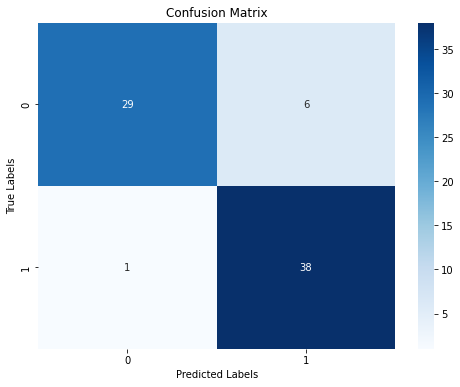

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
accuracy_ci = np.percentile(accuracy_bootstraps, [2.5, 97.5])
print("Accuracy: {:.3f} [{:.3f} - {:.3f}]".format(np.mean(accuracy_bootstraps), accuracy_ci[0], accuracy_ci[1]))

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_test) and predicted probabilities (y_pred_prob_test)
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_test = np.where(y_pred_prob_test >= 0.5, 1, 0)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


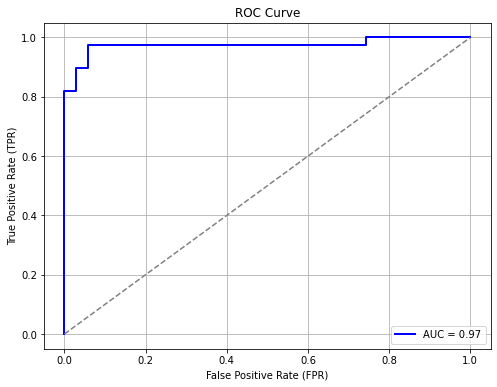

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

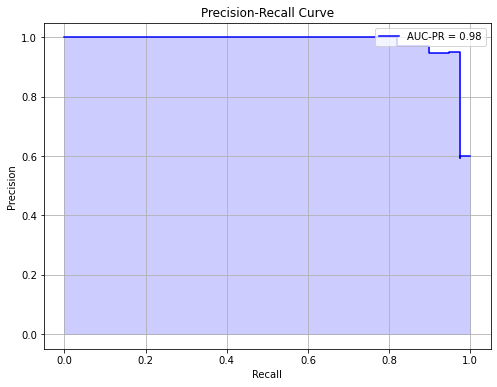

In [61]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_test)

# Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_test)

# Plot the AUC-PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'AUC-PR = {avg_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [62]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Print the feature importances
print("Feature Importances:")
for importance, feature in sorted_feature_importances:
    print(f"{feature}: {importance:.3f}")

Feature Importances:
TDR_Resultat_1.0: 2.404
sympt_toux_maldegorge_1.0: 2.332
voyage_fait_1.0: 2.039
voyage_details_category_no_travel: 1.965
LYMPH_PCT: 1.245
Sexe_F: 1.093
sympt_mal_tete_1.0: 1.073
sympt_fatigue_faiblesse_1.0: 0.944
sympt_vertiges_1.0: 0.876
Antibiotiques pris_1.0: 0.725
saison_pluie: 0.611
sympt_vomissements_1.0: 0.602
sympt_douleur_thoracique_1.0: 0.598
RDW-CV: 0.561
LYMPH_COUNT: 0.492
MPV: 0.466
MID_PCT: 0.439
HGB_COUNT: 0.438
PLT: 0.424
Age: 0.417
glycemie: 0.381
Rythme cardiaque_category_encoded: 0.326
Diagnostic paludisme recu_1.0: 0.309
GRAN_COUNT: 0.285
contact_pers_febrile_1.0: 0.274
voyage_details_category_outside_senegal: 0.200
RBC_COUNT: 0.171
PDW: 0.141
sympt_mal_dos_1.0: 0.109
Temperature_category_encoded: 0.035


In [63]:
#import matplotlib.pyplot as plt

# Get the absolute values of the coefficients and sort them in descending order
#feature_importance_scores = np.abs(weighted_logreg.coef_[0])
#sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
#features, importances = zip(*sorted_feature_importances)

# Create a bar plot
#plt.figure(figsize=(10, 6))
#plt.bar(range(len(features)), importances)
#plt.xticks(range(len(features)), features, rotation=45, ha='right')
#plt.xlabel('Features')
#plt.ylabel('Importance Score')
#plt.title('Feature Importances')
#plt.tight_layout()
#plt.show()

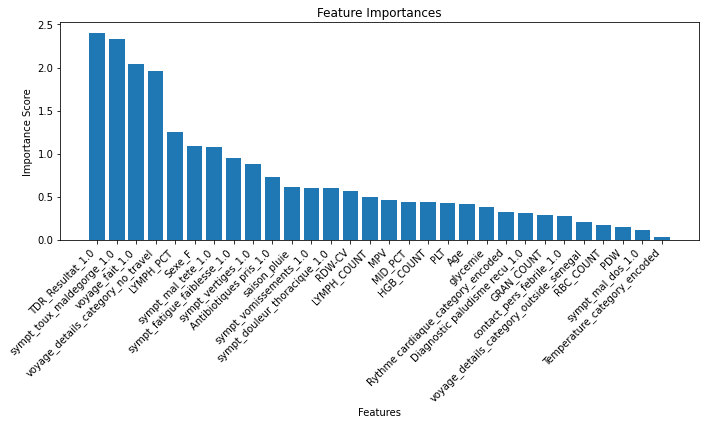

In [64]:
# Get the absolute values of the coefficients and sort them in descending order
feature_importance_scores = np.abs(weighted_logreg.coef_[0])
sorted_feature_importances = sorted(zip(feature_importance_scores, selected_features), reverse=True)

# Extract feature names and importance scores
features, importances = zip(*sorted_feature_importances)

# Create a bar plot with numerical values for bar heights
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), [score for score, _ in sorted_feature_importances])  # Use list comprehension for bar heights
plt.xticks(range(len(features)), [name for _, name in sorted_feature_importances], rotation=45, ha='right')  # Set xticks with feature names
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()
